In [1]:
#Installing necessary libraries

In [2]:
# !pip install --user update seaborn
# !pip uninstall seaborn
# !python -m pip uninstall seaborn --yes

In [3]:
#Importing required libraries

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import sklearn
from statsmodels.formula.api import logit
%matplotlib inline
# import statsmodel
import plotly.express as px

### Exploratory Data Analysis

In [6]:
data = pd.read_csv("teleco.csv")

In [7]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.shape

In [ ]:
data.columns

In [ ]:
data.Churn.value_counts()

## Data Cleaning

In [8]:
data['TotalCharges'] = data['TotalCharges'].apply(lambda x: np.nan if x == ' ' else x).apply(lambda x: float(x))

In [9]:
data = data.dropna()

In [10]:
datay = data[data.Churn == 'Yes']
datan = data[data.Churn == 'No']

## Lets look at the demographic features

In [ ]:
import seaborn as sns
# plt.hist([x, y], color=['r','b'], alpha=0.5)

# plt.figure(figsize = (12, 12))
fig, axs = plt.subplots(2, 2, figsize = (12, 10))
# fig.figsize(20, 20)
axs[0, 0].hist([datay.gender, datan.gender], \
               weights=[np.ones(len(datay)) / len(datay)*100, np.ones(len(datan)) / len(datan)*100],\
               label=['Churn', 'Retained'])
axs[0, 0].set_title('Gender Distribution')

axs[0, 1].hist([datay.SeniorCitizen, datan.SeniorCitizen], \
               weights=[np.ones(len(datay)) / len(datay)*100, np.ones(len(datan)) / len(datan)*100],\
               label=['Churn', 'Retained'])
axs[0, 1].set_title('Senior Citizens')

axs[1, 0].hist([datay.Partner, datan.Partner], \
               weights=[np.ones(len(datay)) / len(datay)*100, np.ones(len(datan)) / len(datan)*100],\
               label=['Churn', 'Retained'])
axs[1, 0].set_title('Partners')

axs[1, 1].hist([datay.Partner, datan.Partner], \
               weights=[np.ones(len(datay)) / len(datay)*100, np.ones(len(datan)) / len(datan)*100],\
               label=['Churn', 'Retained'])
axs[1, 1].set_title('Dependents')

axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()

plt.show()


### Inferences and Possible Hypothesis
1. The chance of churning seems to be higher for Senior Citizens, though not significantly.
2. Customers having partners and dependents(some semblance of a family) have higher retention rate.

In [4]:
plt.figure(figsize = (14,8))
# plt.bar([i[0] for i in enumerate(data.tenure.value_counts())], [i[1] for i in enumerate(data.tenure.value_counts())])
plt.hist([datay.tenure, datan.tenure], \
               weights=[np.ones(len(datay)) / len(datay)*100, np.ones(len(datan)) / len(datan)*100],\
               label=['Churn', 'Retained'], bins = 30)
plt.legend()
plt.xlabel("Tenure (in Months)")
plt.ylabel("Count of Customers")
plt.title("Customers vs Tenure")

NameError: name 'datay' is not defined

<Figure size 1008x576 with 0 Axes>

### Hypothesis:
1. A lot of customers seem to have the telecom service for a very few months(even zero). A very high percentage of the churned customers seem to leave after only one month. It could be possible that people simply buy a telecom plan and then leave the service after a month of use without paying the bill!

### Services Enrolled

NameError: name 'datay' is not defined

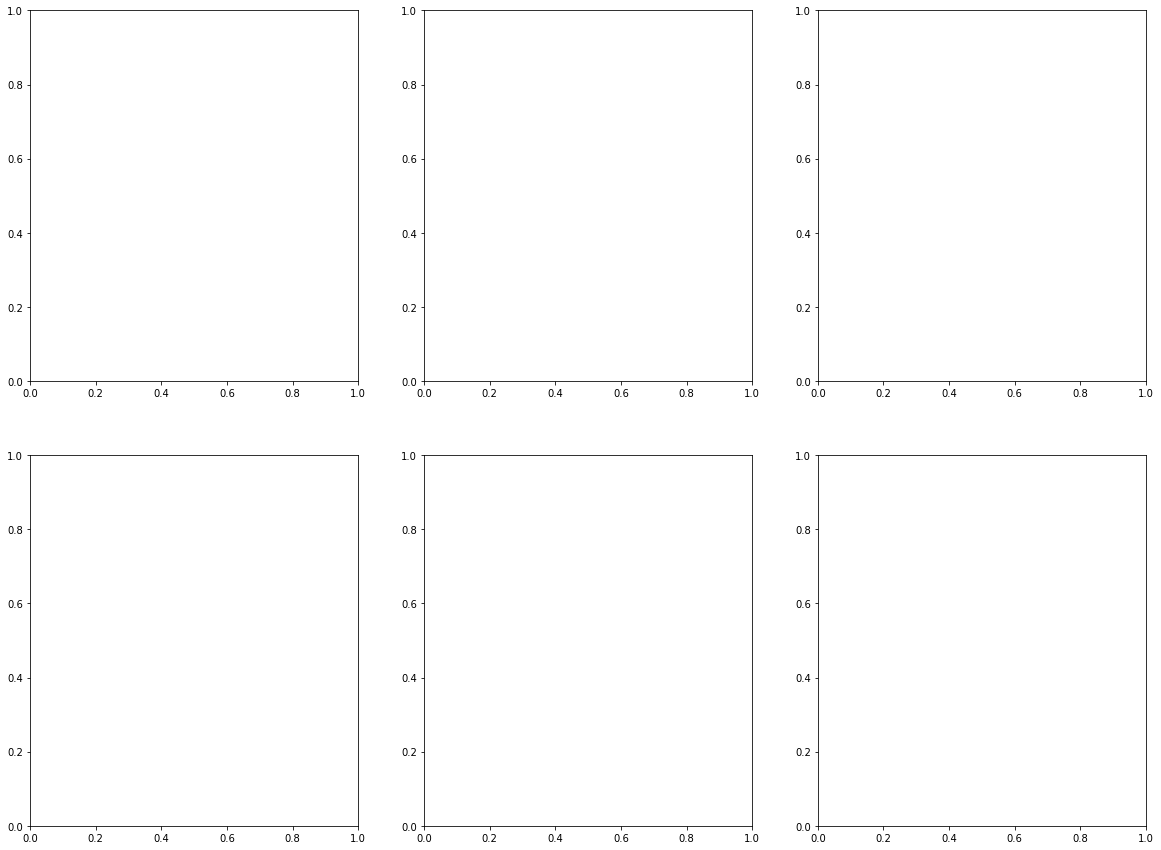

In [5]:
# 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport'
fig, axs = plt.subplots(2, 3, figsize = (20, 15))
# fig.figsize(20, 20)
axs[0, 0].hist([datay.PhoneService, datan.PhoneService], \
               weights=[np.ones(len(datay)) / len(datay)*100, np.ones(len(datan)) / len(datan)*100],\
               label=['Churn', 'Retained'])
axs[0, 0].set_title('Phone Service')
axs[0,0].set_ylabel('Percentage of Customers')

axs[0, 1].hist([datay.MultipleLines, datan.MultipleLines], \
               weights=[np.ones(len(datay)) / len(datay)*100, np.ones(len(datan)) / len(datan)*100],\
               label=['Churn', 'Retained'])
axs[0, 1].set_title('Multiple Lines')

axs[0, 2].hist([datay.InternetService, datan.InternetService], \
               weights=[np.ones(len(datay)) / len(datay)*100, np.ones(len(datan)) / len(datan)*100],\
               label=['Churn', 'Retained'])
axs[0, 2].set_title('Internet Service')

axs[1, 0].hist([datay.OnlineSecurity, datan.OnlineSecurity], \
               weights=[np.ones(len(datay)) / len(datay)*100, np.ones(len(datan)) / len(datan)*100],\
               label=['Churn', 'Retained'])
axs[1, 0].set_title('Online Security')
axs[1,0].set_ylabel('Percentage of Customers')

axs[1, 1].hist([datay.OnlineBackup, datan.OnlineBackup], \
               weights=[np.ones(len(datay)) / len(datay)*100, np.ones(len(datan)) / len(datan)*100],\
               label=['Churn', 'Retained'])
axs[1, 1].set_title('Online Backup')

axs[1, 2].hist([datay.DeviceProtection, datan.DeviceProtection], \
               weights=[np.ones(len(datay)) / len(datay)*100, np.ones(len(datan)) / len(datan)*100],\
               label=['Churn', 'Retained'])
axs[1, 2].set_title('Device Protection')

axs[0,0].legend()
axs[0,1].legend()
axs[0,2].legend()
axs[1,0].legend()
axs[1,1].legend()
axs[1,2].legend()

plt.show()

### Inference / Hypothesis:

1. Customers without an Internet Service surprisingly have a higher retention rate.
2. Customers using Fiber Optic Internet connections seem to have a very high churn rate, which is concerning since it is a newer technology than the DSL.
3. A large percentage of customers that left had not Online Security or Online Backup or Device Protection.


### Viewing Habits

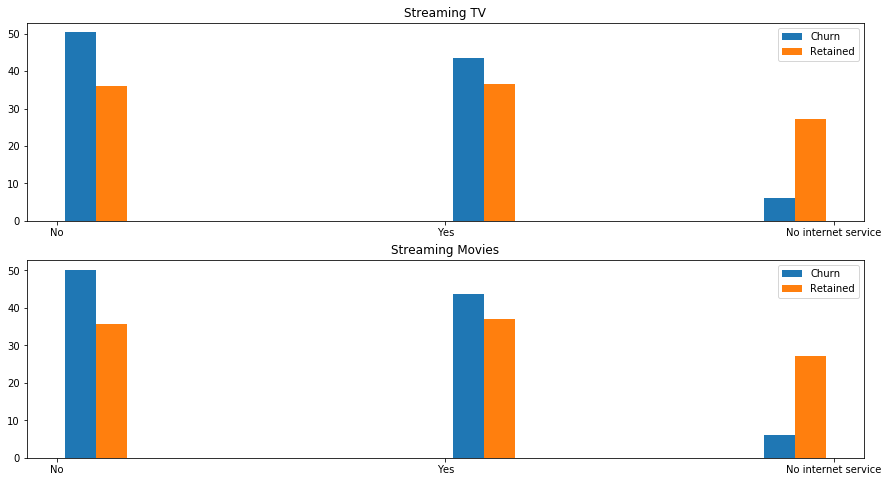

In [13]:
fig, axs = plt.subplots(2, figsize = (15, 8))
# 'StreamingTV', 'StreamingMovies'
axs[0].hist([datay.StreamingTV, datan.StreamingTV], \
               weights=[np.ones(len(datay)) / len(datay)*100, np.ones(len(datan)) / len(datan)*100],\
               label=['Churn', 'Retained'])
axs[0].set_title('Streaming TV')

axs[1].hist([datay.StreamingMovies, datan.StreamingMovies], \
               weights=[np.ones(len(datay)) / len(datay)*100, np.ones(len(datan)) / len(datan)*100],\
               label=['Churn', 'Retained'])
axs[1].set_title('Streaming Movies')
axs[0].legend()
axs[1].legend()
plt.show()

### Payment Habits

No handles with labels found to put in legend.


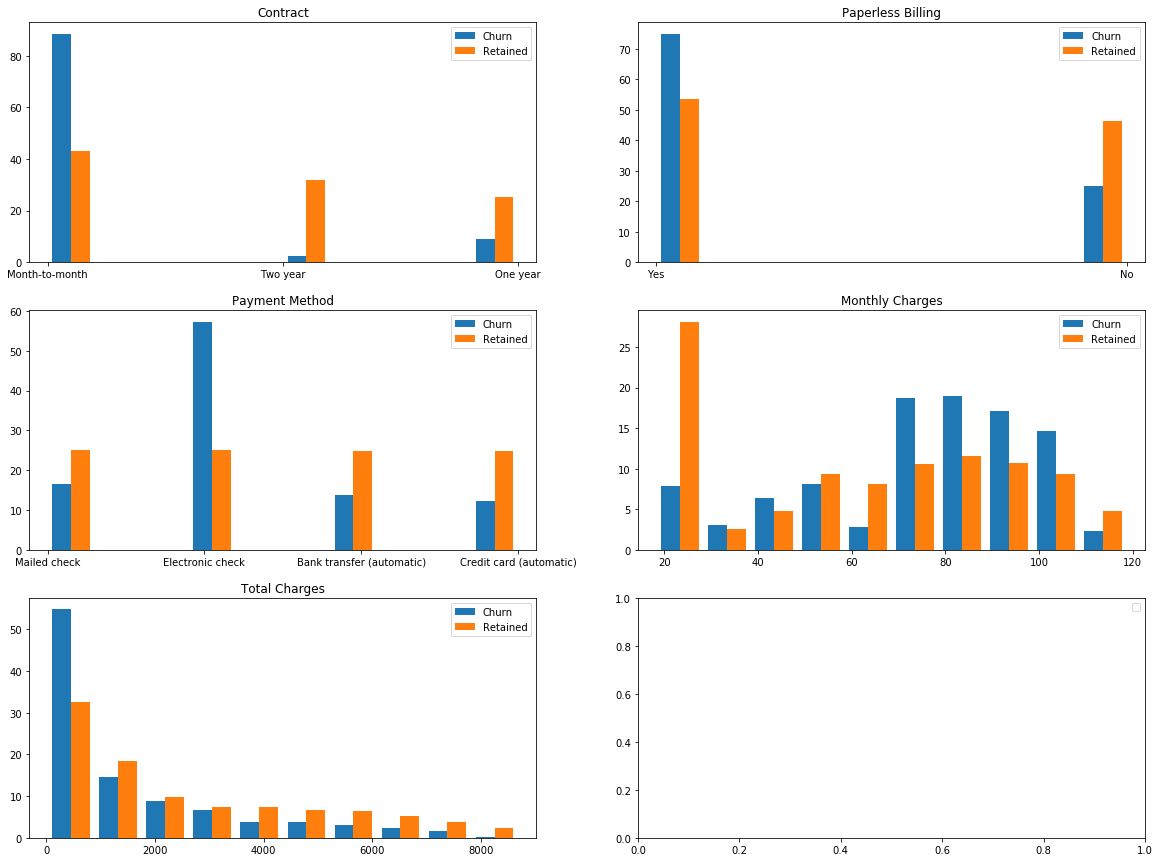

In [14]:
#'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges'

fig, axs = plt.subplots(3, 2, figsize = (20, 15))
# fig.figsize(20, 20)
axs[0, 0].hist([datay.Contract, datan.Contract], \
               weights=[np.ones(len(datay)) / len(datay)*100, np.ones(len(datan)) / len(datan)*100],\
               label=['Churn', 'Retained'], color = ['tab:blue', 'tab:orange'])
axs[0, 0].set_title('Contract')

axs[0, 1].hist([datay.PaperlessBilling, datan.PaperlessBilling], \
               weights=[np.ones(len(datay)) / len(datay)*100, np.ones(len(datan)) / len(datan)*100],\
               label=['Churn', 'Retained'])
axs[0, 1].set_title('Paperless Billing')

axs[1, 0].hist([datay.PaymentMethod, datan.PaymentMethod], \
               weights=[np.ones(len(datay)) / len(datay)*100, np.ones(len(datan)) / len(datan)*100],\
               label=['Churn', 'Retained'])
axs[1, 0].set_title('Payment Method')

axs[1, 1].hist([datay.MonthlyCharges, datan.MonthlyCharges], \
               weights=[np.ones(len(datay)) / len(datay)*100, np.ones(len(datan)) / len(datan)*100],\
               label=['Churn', 'Retained'])
axs[1, 1].set_title('Monthly Charges')

axs[2, 0].hist([datay.TotalCharges, datan.TotalCharges], \
               weights=[np.ones(len(datay)) / len(datay)*100, np.ones(len(datan)) / len(datan)*100],\
               label=['Churn', 'Retained'])
axs[2, 0].set_title('Total Charges')

axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()
axs[2,1].legend()
axs[2,0].legend()
# axs[2,2].legend()

plt.show()

### Inference / Hypothesis:
1. Total Charges are 0 for a very high percentage of Churn customers, reinforcing the earlier hypothesis that a lot of customers simply register for a month and leave the service without paying a bill.
2. Surprisingly, of the retained customers, a very high percentage are low monthly charge customers. 
3. A large percentage of the churn customers are high paying, high monthly charge customers
4. Electronic Transfer
5. Month- to -month

In [15]:
pd.get_dummies(data["Churn"])["No"] # We assume that all customers will eventually churn

0       1
1       1
2       0
3       1
4       0
       ..
7038    1
7039    1
7040    1
7041    0
7042    1
Name: No, Length: 7032, dtype: uint8

In [16]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [11]:
from statsmodels.base.model import GenericLikelihoodModel
import scipy.stats as spst

In [12]:
class Weibull_C(GenericLikelihoodModel):
    def loglike(self, params):
        y=self.endog
        censored=self.exog
        censored=censored.squeeze()
        
        c,lmbda=np.exp(params)
        Ft=spst.weibull_min.cdf(y,c=c, scale=1/lmbda)
        Ft_m1=spst.weibull_min.cdf(y-1,c=c, scale=1/lmbda)
        likelihood= (1-censored)*(Ft-Ft_m1) + censored*(1-Ft)
        loglikelihood=np.log(likelihood)
        return np.sum(loglikelihood)


Model1=Weibull_C(data["tenure"] + 1,pd.get_dummies(data["Churn"])["No"].values).fit(start_params=-np.random.rand(2),method="bfgs",xtol=0.00000000000001)
# Model.summary(xname=["Deductible","Premium","Income_o2","Const_o2","Income_o3","Const_o3","Income_o4","Const_o4","Income_o5","Const_o5"]))
print(Model1.summary(xname=["c", "lambda"]))

Optimization terminated successfully.
         Current function value: 1.521398
         Iterations: 17
         Function evaluations: 18
         Gradient evaluations: 18
                              Weibull_C Results                               
Dep. Variable:                 tenure   Log-Likelihood:                -10698.
Model:                      Weibull_C   AIC:                         2.140e+04
Method:            Maximum Likelihood   BIC:                         2.141e+04
Date:                Tue, 01 Sep 2020                                         
Time:                        16:14:25                                         
No. Observations:                7032                                         
Df Residuals:                    7031                                         
Df Model:                           0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

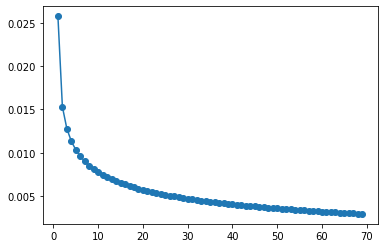

In [13]:
#probability of churning in each period

y=np.arange(1,70)
c=np.exp(Model1.params[0])
lmbda=np.exp(Model1.params[1])

Ft=spst.weibull_min.cdf(y,c,scale=1/lmbda)
Ft_m1=spst.weibull_min.cdf(y-1,c,scale=1/lmbda)
likelihood1=Ft-Ft_m1
plt.plot(y,likelihood1,marker="o")

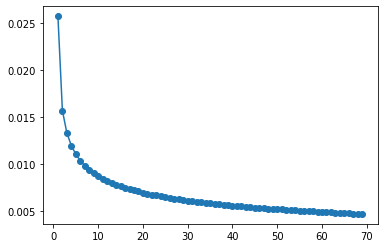

In [14]:
#compute hazard
hazard= (Ft-Ft_m1)/(1-Ft_m1)
plt.plot(y,hazard,marker="o")

#### Posterior Analysis

Based on the model estimation result, if there are 7000 customers, how many of them will churn within 1 month, 2 months, 3 months...?

Based on the model estimation result, if there are 7000 customers, how many of them will churn within 1 month, 2 months, 3 months...?  [ 180.28787802  287.41069341  376.78346618  456.02017722  528.32763799
  595.44852671  658.46608449  718.11318103  774.9156264   829.26734024
  881.4734022   931.77639591  980.37338781 1027.42733694 1073.0750309
 1117.43276737 1160.60052282 1202.6650768  1243.70239704 1283.77949008
 1322.955858   1361.28465992 1398.81364876 1435.5859348  1471.6406138
 1507.01328832 1541.73650374 1575.8401156  1609.3516012  1642.2963255
 1674.69776938 1706.57772653 1737.95647435 1768.8529227  1799.28474414
 1829.26848837 1858.81968316 1887.95292371 1916.681952   1945.01972756
 1972.97849066 2000.56981906 2027.8046789  2054.69347071 2081.24607088
 2107.47186927 2133.37980337 2158.97838931 2184.27575023 2209.27964211
 2233.99747747 2258.43634706 2282.60303982 2306.50406122 2330.14565018
 2353.53379467 2376.67424615 2399.57253291 2422.23397248 2444.6636831
 2466.86659443 24

Text(0, 0.5, 'Number of Customers')

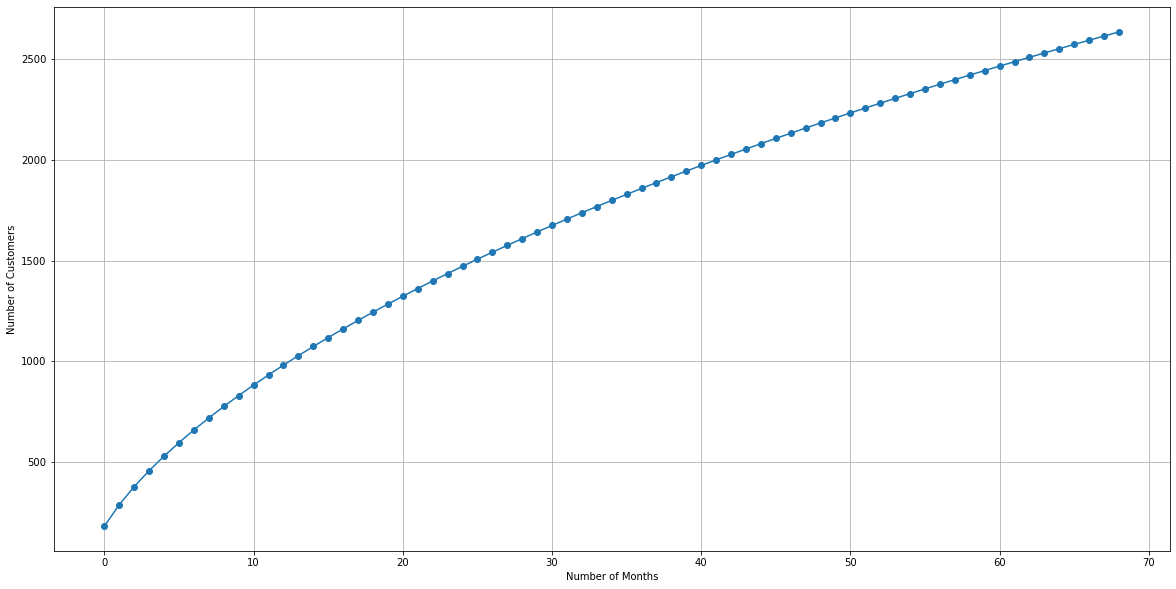

In [21]:
y=np.arange(1,70)
c=np.exp(Model1.params[0])
lmbda=np.exp(Model1.params[1])

Ft=spst.weibull_min.cdf(y,c,scale=1/lmbda)
Ft_m1=spst.weibull_min.cdf(y-1,c,scale=1/lmbda)
print("Based on the model estimation result, if there are 7000 customers, how many of them will churn within 1 month, 2 months, 3 months...? ", np.cumsum(7000*(Ft-Ft_m1)))
lis_ = np.cumsum(7000*(Ft-Ft_m1)).tolist()

plt.figure(figsize=(20,10))
plt.grid()
plt.plot([i for i in range(len(lis_))],lis_,marker= "o")
plt.xlabel("Number of Months")
plt.ylabel("Number of Customers")




#### Based on the model estimation result, if a customer is still with the company after 4 months, what is the probability for this cusomer to churn in month 5, 6, 7...?

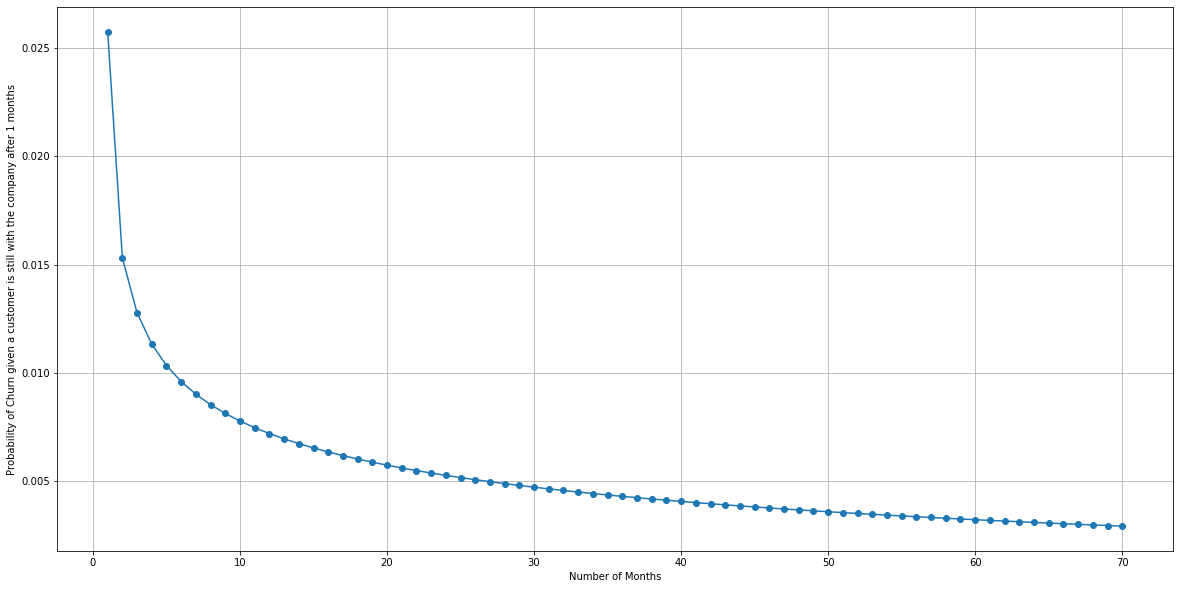

In [22]:
def churn_months(s,e):
    y=np.arange(s,e)
    Ft=spst.weibull_min.cdf(y,c=c, scale=1/lmbda)
    Ft_m1=spst.weibull_min.cdf(y-1,c=c, scale=1/lmbda)

    prb = (Ft-Ft_m1)/(1-Ft_m1[0]).tolist()
    xs = [i for i in range(s,e)]
    plt.figure(figsize=(20,10))
    plt.grid()
    plt.plot(xs,prb,marker= "o")
    plt.xlabel("Number of Months")
    plt.ylabel(f"Probability of Churn given a customer is still with the company after {s} months")
#     print("Sum", sum(prb))
churn_months(1,71)

In [16]:
class Weibull_2C(GenericLikelihoodModel):
    def loglike(self, params):
        y=self.endog
        censored=self.exog
        #fill in
        censored=censored.squeeze()
        c,lmbda1, lmbda2,p=np.exp(params)
        #p =np.exp(beta)/(1+np.exp(beta))
        p=p/(1+p)
        Ft1=spst.weibull_min.cdf(y, c=c,scale=1/lmbda1)
        Ft1_m1=spst.weibull_min.cdf(y-1, c=c,scale=1/lmbda1)   
        Ft2=spst.weibull_min.cdf(y, c=c,scale=1/lmbda2)
        Ft2_m1=spst.weibull_min.cdf(y-1, c=c,scale=1/lmbda2)
        
        #likeliho0d for seg1
        likelihood1=(1-censored)*(Ft1-Ft1_m1)+censored*(1-Ft1)
        
        #likelihood for seg 2
        likelihood2=(1-censored)*(Ft2-Ft2_m1)+censored*(1-Ft2)
        
        # assemble
        likelihood=likelihood1*p+likelihood2*(1-p)
  
        loglikelihood=np.log(likelihood)
        return np.sum(loglikelihood)
    
Model2=Weibull_2C(data["tenure"] + 1,pd.get_dummies(data["Churn"])["No"].values).fit(start_params= -np.random.rand(4),method="bfgs",xtol=0.00000000000001)
# Model.summary(xname=["Deductible","Premium","Income_o2","Const_o2","Income_o3","Const_o3","Income_o4","Const_o4","Income_o5","Const_o5"]))
print(Model2.summary(xname=["c", "lambda1", "lambda2", "prolty"]))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning:

divide by zero encountered in log

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/numdiff.py:159: RuntimeWarning:

invalid value encountered in double_scalars



Optimization terminated successfully.
         Current function value: 1.498446
         Iterations: 36
         Function evaluations: 47
         Gradient evaluations: 47
                              Weibull_2C Results                              
Dep. Variable:                 tenure   Log-Likelihood:                -10537.
Model:                     Weibull_2C   AIC:                         2.108e+04
Method:            Maximum Likelihood   BIC:                         2.108e+04
Date:                Tue, 01 Sep 2020                                         
Time:                        16:17:22                                         
No. Observations:                7032                                         
Df Residuals:                    7031                                         
Df Model:                           0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

(1.3208700604562542,
 0.2302501778270417,
 0.006502572719868528,
 0.12463429771128652)

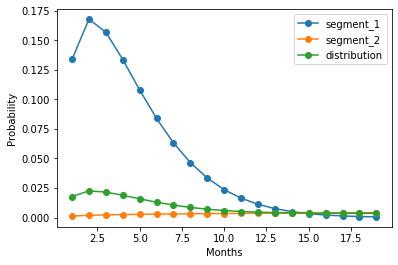

In [23]:
params=Model2.params
c,lmbda1, lmbda2,p=np.exp(params)
#p =np.exp(beta)/(1+np.exp(beta))
p=p/(1+p)

y=np.arange(1,20)
Ft1=spst.weibull_min.cdf(y, c=c,scale=1/lmbda1)
Ft1_m1=spst.weibull_min.cdf(y-1, c=c,scale=1/lmbda1)   
Ft2=spst.weibull_min.cdf(y, c=c,scale=1/lmbda2)
Ft2_m1=spst.weibull_min.cdf(y-1, c=c,scale=1/lmbda2)
 
#segment 1: 
plt.plot(y,Ft1-Ft1_m1,marker="o", label = "segment_1")
plt.plot(y,Ft2-Ft2_m1,marker="o", label = "segment_2")
plt.plot(y,(Ft1-Ft1_m1)*p+(Ft2-Ft2_m1)*(1-p),marker="o", label = "distribution")
plt.xlabel("Months")
plt.ylabel("Probability")
plt.legend()
c,lmbda1, lmbda2,p # prolty of segment 1

1.3208700604562542

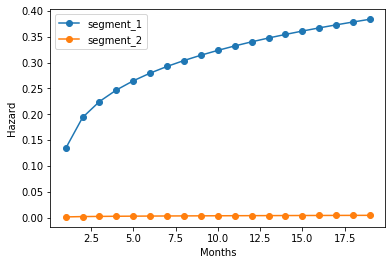

In [27]:
plt.plot(y,(Ft1-Ft1_m1)/(1-Ft1_m1),marker="o", label = "segment_1")
plt.plot(y,(Ft2-Ft2_m1)/(1-Ft2_m1),marker="o", label = "segment_2")
plt.xlabel("Months")
plt.ylabel("Hazard")
plt.legend()
c

#### Posterior Analysis

#### For a new application, what is the probability this application belongs to segment 1

In [19]:
p

0.12463429771128652

#### Based on the model estimation result, if there are 7000 customers, how many of them will churn within 1 month, 2 months, 3 months...?

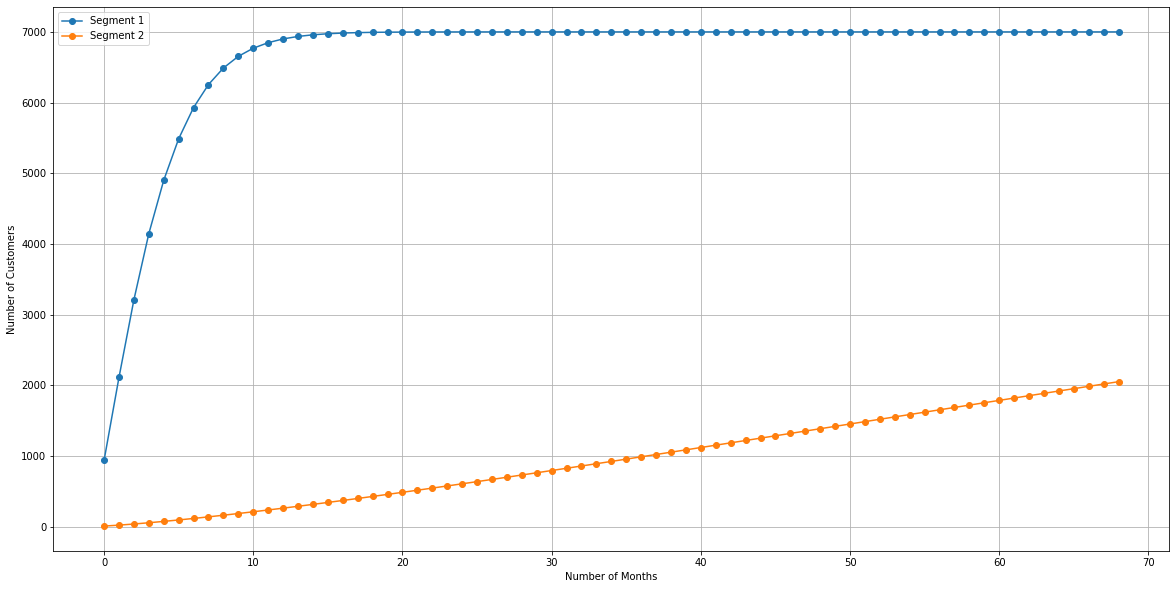

In [21]:
params=Model2.params
c,lmbda1, lmbda2,p=np.exp(params)
#p =np.exp(beta)/(1+np.exp(beta))
p=p/(1+p)

y=np.arange(1,70)
Ft1=spst.weibull_min.cdf(y, c=c,scale=1/lmbda1)
Ft1_m1=spst.weibull_min.cdf(y-1, c=c,scale=1/lmbda1)   
Ft2=spst.weibull_min.cdf(y, c=c,scale=1/lmbda2)
Ft2_m1=spst.weibull_min.cdf(y-1, c=c,scale=1/lmbda2)


# print("Based on the model estimation result, if there are 7000 customers in segment one, how many of them will churn within 1 month, 2 months, 3 months...? ", np.cumsum(7000*(Ft1-Ft1_m1)))
# print("Based on the model estimation result, if there are 7000 customers in segment two, how many of them will churn within 1 month, 2 months, 3 months...? ", np.cumsum(7000*(Ft2-Ft2_m1)))
lis_1 = np.cumsum(7000*(Ft1-Ft1_m1)).tolist()
lis_2 = np.cumsum(7000*(Ft2-Ft2_m1)).tolist()
plt.figure(figsize=(20,10))
plt.grid()
plt.plot([i for i in range(len(lis_1))],lis_1,marker= "o", label= 'Segment 1')
plt.xlabel("Number of Months")
plt.ylabel("Number of Customers")
plt.plot([i for i in range(len(lis_2))],lis_2,marker= "o", label = "Segment 2")
plt.xlabel("Number of Months")
plt.ylabel("Number of Customers")
plt.legend()




#### Based on the model estimation result, if a customer is still with the company after 4 months, what is the probability for this cusomer to churn in month 5, 6, 7...?

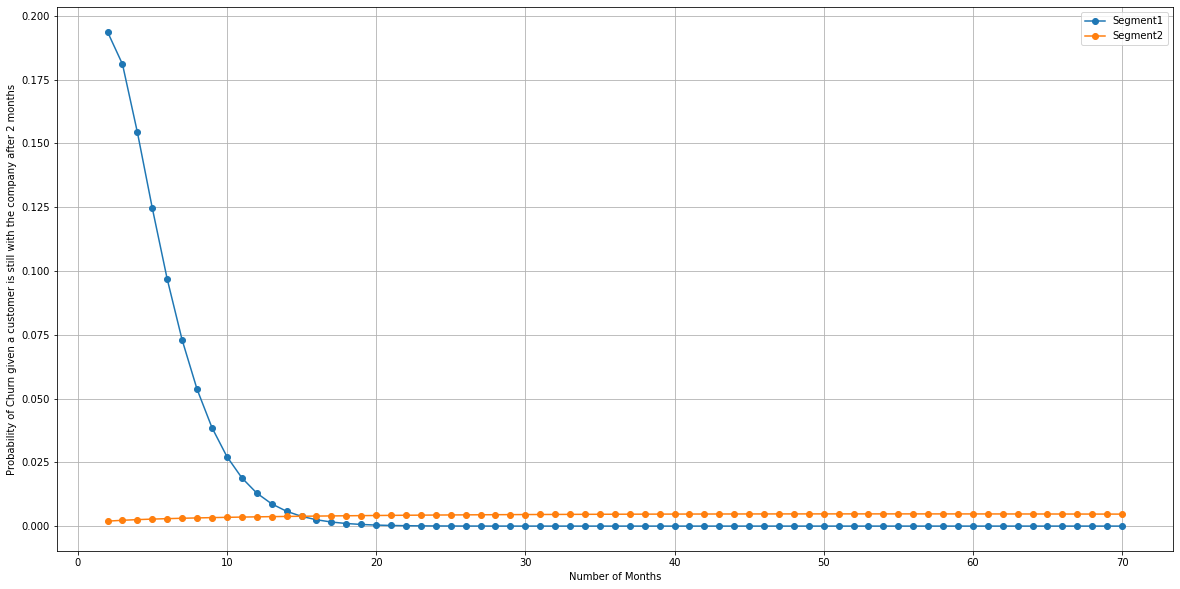

In [38]:
def churn_months(s,e):

    params=Model2.params
    c,lmbda1, lmbda2,p=np.exp(params)
    p=p/(1+p)

    y=np.arange(s,e)
    Ft1=spst.weibull_min.cdf(y, c=c,scale=1/lmbda1)
    Ft1_m1=spst.weibull_min.cdf(y-1, c=c,scale=1/lmbda1)   
    Ft2=spst.weibull_min.cdf(y, c=c,scale=1/lmbda2)
    Ft2_m1=spst.weibull_min.cdf(y-1, c=c,scale=1/lmbda2)
    
    prb1 = (Ft1-Ft1_m1)/(1-Ft1_m1[0]).tolist()
    prb2 = (Ft2-Ft2_m1)/(1-Ft2_m1[0]).tolist()
    
    xs = [i for i in range(s,e)]
    plt.figure(figsize=(20,10))
    plt.grid()
    plt.plot(xs,prb1,marker= "o", label = "Segment1")
    plt.xlabel("Number of Months")
    plt.ylabel(f"Probability of Churn given a customer is still with the company after {s} months")
    plt.plot(xs,prb2,marker= "o", label = "Segment2")
    plt.legend()
    
churn_months(2,71)